In [ ]:
%load_ext autoreload
%autoreload 2

import inspect
import os
import sys
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, os.path.join(parent_dir)) 

from coord2vec.models.data_loading.tile_features_loader import TileFeaturesDataset
from coord2vec.config import *
import matplotlib.pyplot as plt

from coord2vec.models.data_loading.create_dataset_script import sample_and_save_dataset


In [ ]:
CACHE_DIR = os.path.join(LONG_TERM_DIR, "cache_data", "build_road_park_multi_with_norm")
# CACHE_DIR = os.path.join("/media/yonatanz/yz", "cache_data", "test_fit_large_multi_build")
# CACHE_DIR = '../coord2vec_data/house_price_builder'
TRAIN_CACHE_DIR = os.path.join(CACHE_DIR, 'train')
VAL_CACHE_DIR = os.path.join(CACHE_DIR, 'validation')

Building dataset for /media/yonatanz/yz/cache_data/build_road_park_multi_with_norm/validation

Calculating features:   
Calculation took 0.3186767101287842

Building dataset for /media/yonatanz/yz/cache_data/build_road_park_multi_with_norm/train
request failed [?]: http://localhost:8103/tile/17/78100/53406.png
request failed [?]: http://localhost:8101/tile/17/78115/53435.png
request failed [?]: http://localhost:8101/tile/17/78120/53416.png
request failed [?]: http://localhost:8101/tile/17/78123/53435.png
request failed [?]: http://localhost:8101/tile/17/78121/53416.png
request failed [?]: http://localhost:8101/tile/17/78121/53417.png
request failed [?]: http://localhost:8101/tile/17/78123/53421.png
request failed [?]: http://localhost:8103/tile/17/78113/53412.png
request failed [?]: http://localhost:8101/tile/17/78123/53436.png
request failed [?]: http://localhost:8101/tile/17/78120/53436.png
request failed [?]: http://localhost:8101/tile/17/78109/53430.png
request failed [?]: http://l

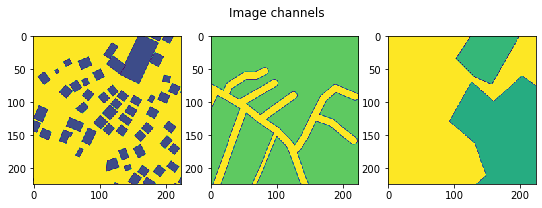

In [4]:

sample_and_save_dataset(VAL_CACHE_DIR, sample_num=VAL_SAMPLE_NUM, feature_builder=get_builder(),
                        use_existing=True)
sample_and_save_dataset(TRAIN_CACHE_DIR, sample_num=TRAIN_SAMPLE_NUM, feature_builder=get_builder(),
                        use_existing=True)


builder = get_builder()

train_dataset = TileFeaturesDataset(TRAIN_CACHE_DIR, builder)
val_dataset = TileFeaturesDataset(VAL_CACHE_DIR, builder)


sample_ind = 3

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
axs[0].imshow(train_dataset[sample_ind][0][0])
axs[1].imshow(train_dataset[sample_ind][0][1])
axs[2].imshow(train_dataset[sample_ind][0][2])
fig.suptitle('Image channels')
plt.show()

features = [feature.feature_names for feature in builder.features]
print(list(zip(features, train_dataset[sample_ind][1])))